In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
vgg19 = models.vgg19(pretrained=True).features
vgg19.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 72.6MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

cifar10 = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


100%|██████████| 170M/170M [00:02<00:00, 61.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
sample_image, _ = cifar10[0]
sample_image = sample_image.unsqueeze(0)


In [5]:
def get_feature_maps(image, model):
    layers = []
    x = image
    for layer in model.children():
        x = layer(x)
        layers.append(x)
    return layers


In [15]:
def gram_matrix(tensor):
    b, c, h, w = tensor.size()
    features = tensor.view( c, h * w)
    G = torch.mm(features, features.t())
    return G.div(c * h * w)


In [31]:
def plot_feature_maps(feature_maps, num_maps=16, colormap='plasma'):
    num_feature_maps = min(feature_maps.shape[1], num_maps)
    grid_size = int(np.sqrt(num_feature_maps))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    axes = axes.flatten()

    for i in range(grid_size * grid_size):
        if i < num_feature_maps:
            ax = axes[i]
            feature_map = feature_maps[0, i].detach().cpu().numpy()
            ax.imshow(feature_map, cmap=colormap, interpolation='nearest')
            ax.axis('off')
        else:
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()


In [32]:
def plot_gram_matrix(gram_matrix):
    plt.figure(figsize=(8, 8))
    plt.imshow(gram_matrix.detach().numpy(), cmap='viridis')
    plt.colorbar()
    plt.title('Gram Matrix')
    plt.show()


In [35]:
import torchvision.transforms.functional as F

def display_image(img):
    img = img.squeeze(0)
    img = F.normalize(img, mean=[-0.485, -0.456, -0.406], std=[1/0.229, 1/0.224, 1/0.225])
    img = img.permute(1, 2, 0)
    img = np.clip(img.detach().cpu().numpy(), 0, 1)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()



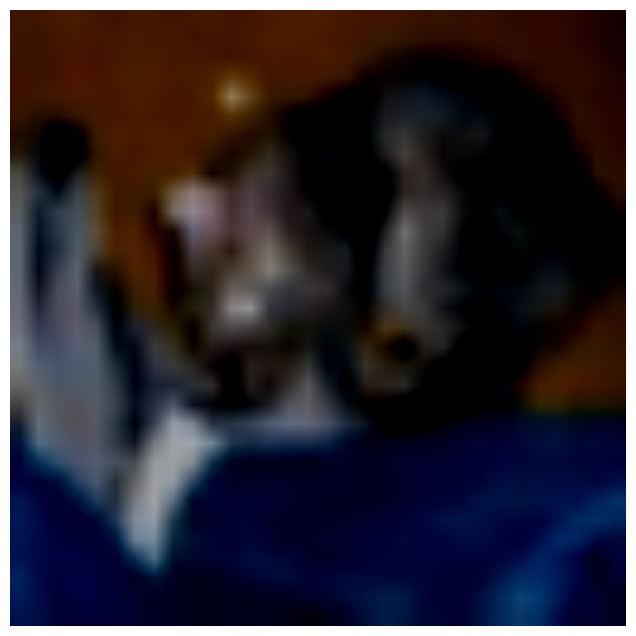

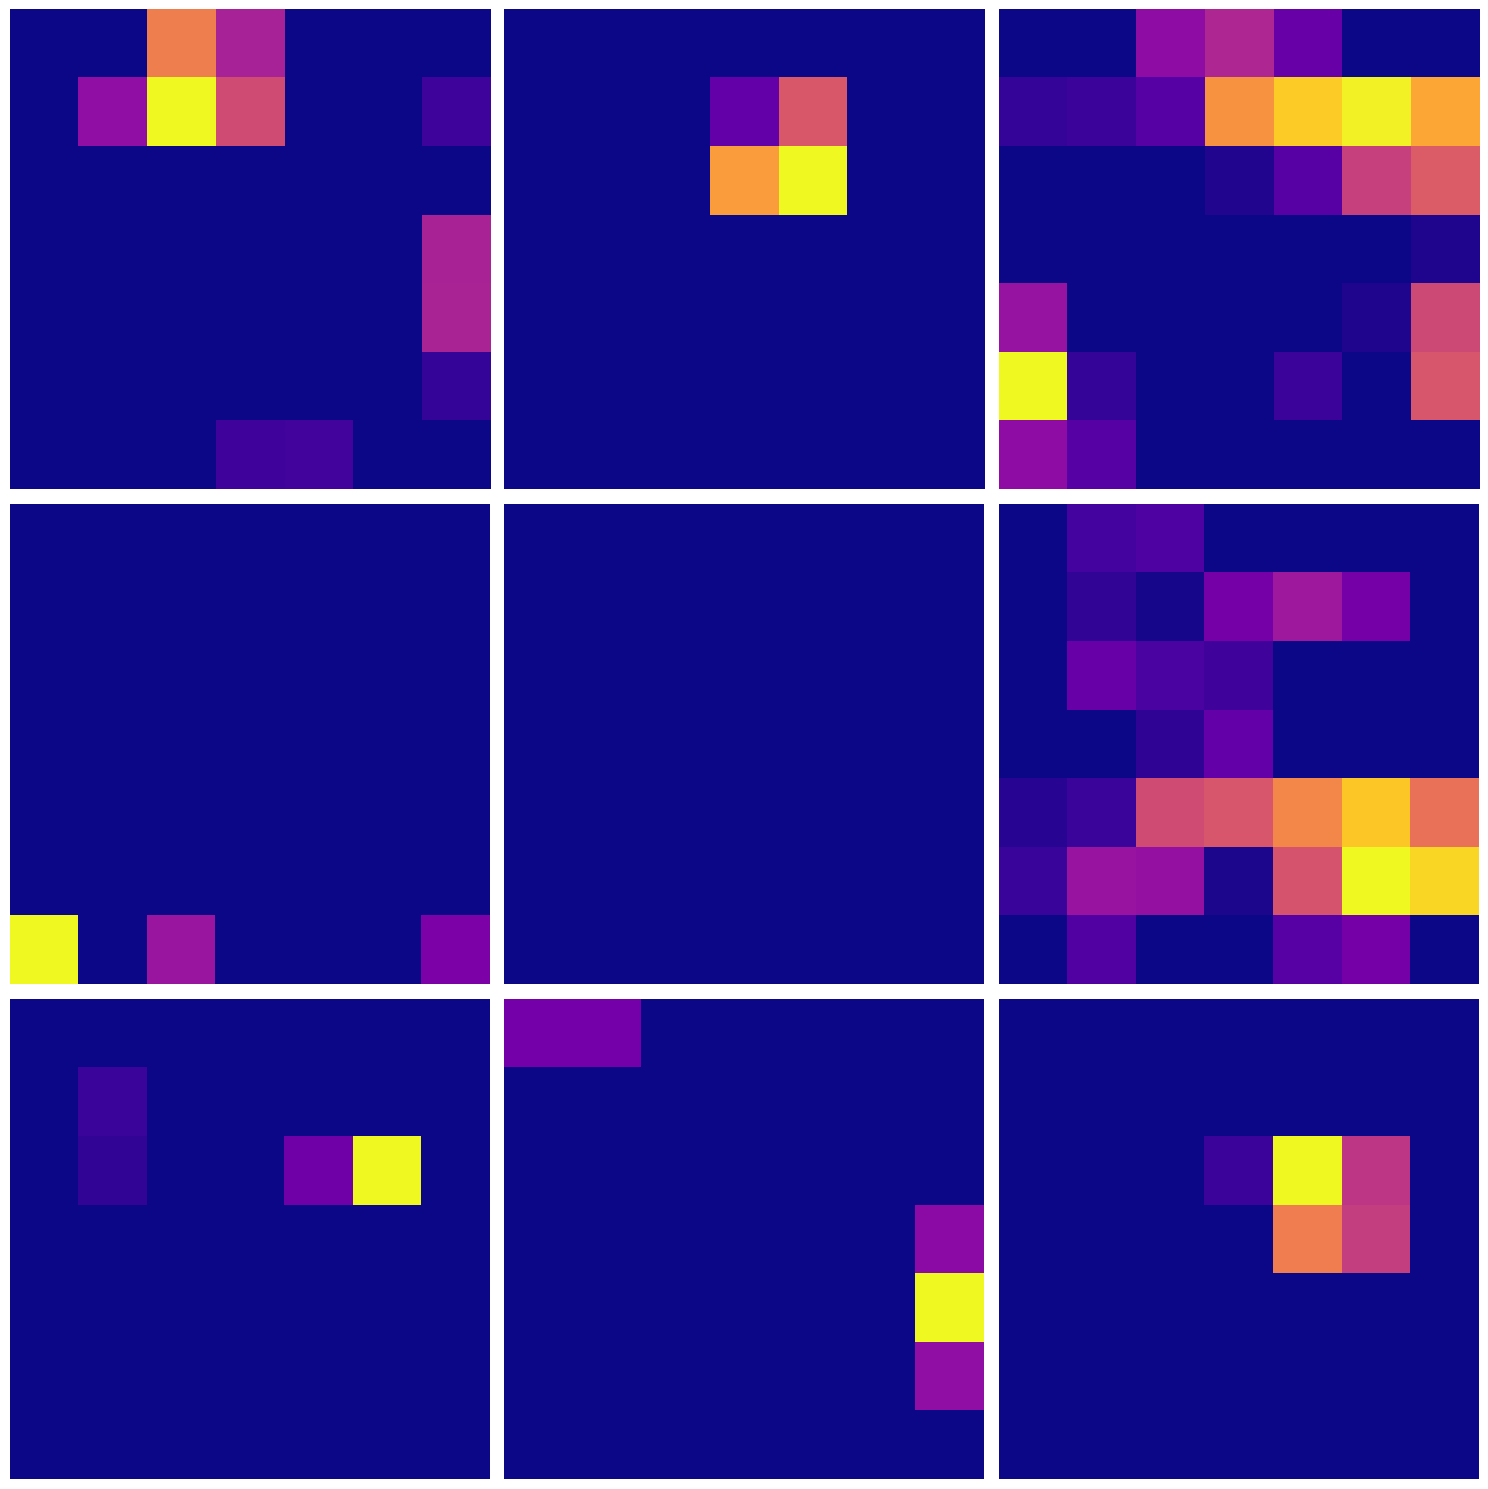

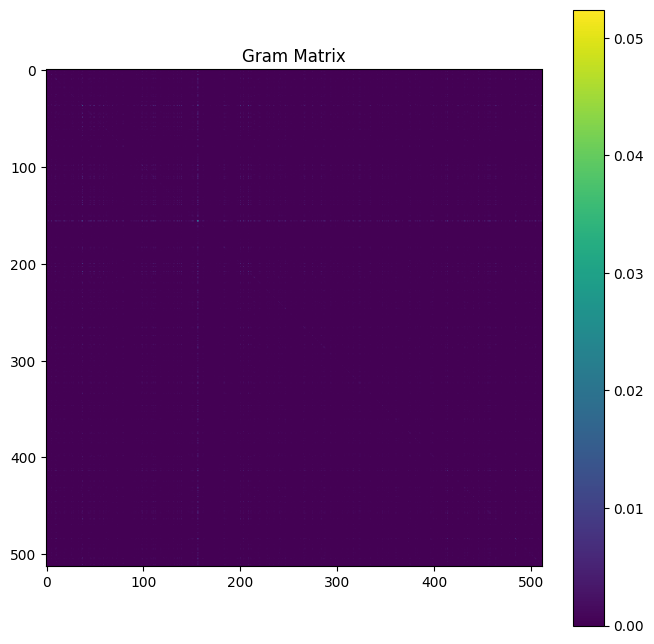

In [36]:

sample_image, _ = cifar10[0]
sample_image = sample_image.unsqueeze(0)

display_image(sample_image)

feature_maps = get_feature_maps(sample_image, vgg19)
plot_feature_maps(feature_maps[-1], num_maps=9, colormap='plasma')
gram_matrices = [gram_matrix(fm) for fm in feature_maps]
plot_gram_matrix(gram_matrices[-1])
